<a href="https://colab.research.google.com/github/louis030195/colabs/blob/master/Crowd_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install face_recognition EmoPy

    100% |████████████████████████████████| 15.7MB 1.9MB/s 
    100% |████████████████████████████████| 100.2MB 387kB/s 
    100% |████████████████████████████████| 133kB 31.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
  Stored in directory: /root/.cache/pip/wheels/a5/8e/31/b4cae7e5507f8582e77d7f5cf2815be8820ccacfa0519ca60c
  Stored in directory: /root/.cache/pip/wheels/7a/2c/db/ad3c876767bfdaf955ede9b7c0315a99abb12c0bdd2a469eff
Successfully built face-recognition-models lasagne scikit-neuralnetwork
emopy 0.0.5 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.14.6 which is incompatible.


In [0]:
import os
import numpy as np
import face_recognition
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from EmoPy.src.fermodel import FERModel
from pkg_resources import resource_filename

Using TensorFlow backend.


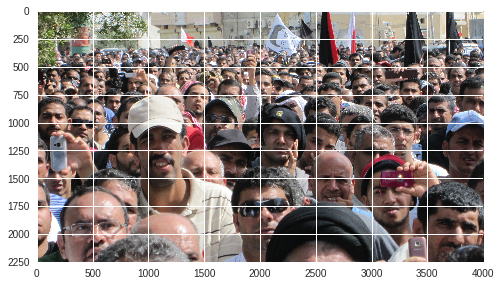

In [0]:
img = "people3.jpg"
plt.imshow(mpimg.imread(img))

In [0]:
def main():
  # Load the jpg file into a numpy array
  image = face_recognition.load_image_file(img)

  # Find all the faces in the image using a pre-trained convolutional neural network.
  # This method is more accurate than the default HOG model, but it's slower
  # unless you have an nvidia GPU and dlib compiled with CUDA extensions. But if you do,
  # this will use GPU acceleration and perform well.
  # See also: find_faces_in_picture.py
  face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=0, model="cnn")

  print("I found {} face(s) in this photograph.".format(len(face_locations)))

  for face_location in face_locations:

      # Print the location of each face in this image
      top, right, bottom, left = face_location
      print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

      # You can access the actual face itself like this:
      face_image = image[top:bottom, left:right]
      result = Image.fromarray((face_image * 255).astype(np.uint8))
      result.save("face_image.png", "PNG")
      target_emotions = ['calm', 'anger', 'happiness']
      model = FERModel(target_emotions, verbose=True)
      model.predict("face_image.png")

      #pil_image = Image.fromarray(face_image)
      #plt.imshow(Image.fromarray(face_image))

In [0]:
main()

I found 53 face(s) in this photograph.
A face is located at pixel location Top: 662, Left: 3260, Bottom: 826, Right: 3424
Initializing FER model parameters for target emotions: ['calm', 'anger', 'happiness']
anger: 41.3%
calm: 4.9%
happiness: 53.8%
Dominant emotion: happiness

A face is located at pixel location Top: 1027, Left: 2005, Bottom: 1310, Right: 2288
Initializing FER model parameters for target emotions: ['calm', 'anger', 'happiness']
anger: 45.3%
calm: 0.0%
happiness: 54.7%
Dominant emotion: happiness

A face is located at pixel location Top: 459, Left: 3496, Bottom: 573, Right: 3610
Initializing FER model parameters for target emotions: ['calm', 'anger', 'happiness']
anger: 41.7%
calm: 0.0%
happiness: 58.3%
Dominant emotion: happiness

A face is located at pixel location Top: 405, Left: 2798, Bottom: 500, Right: 2893
Initializing FER model parameters for target emotions: ['calm', 'anger', 'happiness']
anger: 52.6%
calm: 16.1%
happiness: 31.3%
Dominant emotion: anger

A face